<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2021 Exam Coding 1
***

This exam coding segment is due on Canvas by **11:59 PM on Friday October 15*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  


Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted [here](https://drive.google.com/drive/folders/1Dl7ndZbcSZhIRM-1_OXXue5D8VgMd9NP?usp=sharing).  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
from scipy import stats
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [40 points] Problem 1: Working with Data

You've been hired as part of the data team for the hit new mobile game, *League of Fledglings*, where you choose an adorable baby animal as your avatar and wage "battles" with other players to determine who will rule over Baby Animal Farm.  Being a mobile game, *League of Fledglings* is highly monetized, and players are regularly encouraged to purchase access to *Fledgies*, which alter the appearance of your in-game avatar fledgling.  After all, why use a regular baby elephant when you could pay money to use a *chartreuse* baby elephant?  

After each game, players are asked to evaluate how much they enjoyed that game (on a scale of 1-10).  They are also presented with a link to a new *Fledgie* to consider purchasing.

In `pay2win.csv` your bosses have provided you with one month's player data.  Each of the 2430 rows are the data for a different user.  For each player, you have been provided with the following:

- Age: the player's self-reported age on account creation.
- Sex: the player's self-reported sex on account creation.  A "choose not to report/nonbinary" option is available.
- Interest: the player's median response to the "enjoyment" poll.
- Clicks: the number of times that month that the player clicked on the link to a new *Fledgie*.
- Purchased: the dollar amount purchased by the player that month.


In [2]:
df=pd.read_csv('pay2win.csv')

**Part A:** Explore

Create histograms of each of the 5 columns.  For each variable, describe how many modes it has and if it's unimodal whether or not it exhibits any skewness (be careful with binning on `Purchased`).  Use `df.describe` to get an overall picture of the data.

        Unnamed: 0          Age     Interest       Clicks    Purchased
count  7580.000000  7580.000000  7580.000000  7580.000000  7580.000000
mean   4982.551847    43.076898     5.615172     1.728232    86.893230
std    2879.073283    15.973868     2.372559     1.874199   155.192298
min       0.000000     8.000000     0.000000     0.000000     0.000000
25%    2513.750000    29.787473     3.000000     0.000000     0.000000
50%    4951.500000    43.105088     6.000000     1.000000     0.000000
75%    7470.250000    56.715565     7.000000     3.000000   123.644589
max    9999.000000    76.343229    10.000000    14.000000  1502.236449


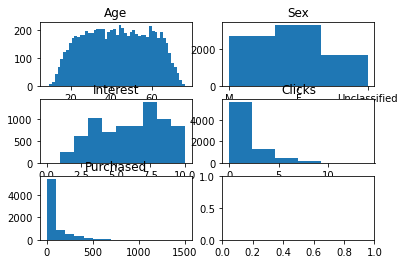

In [3]:
#make histograms, use describe

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2)


ax0.hist(df["Age"], 50)
ax0.set_title("Age")

ax1.hist(df["Sex"], 3)
ax1.set_title("Sex")

ax2.hist(df["Interest"], 10)
ax2.set_title("Interest")

ax3.hist(df["Clicks"], 6)
ax3.set_title("Clicks")

ax4.hist(df["Purchased"], 15)
ax4.set_title("Purchased")

print(df.describe())

**Markdown for A**
Age - There are as many modes as the size of the data set since there is no same two numbers. Age is unimodal with a flat top and it is not skewed, since the mean and median are the same.

Sex- Female is the mode. It is hard to describe this data since it is not linear numbers. However the histogram looks to be unimodal.

Interest - 7 is the mode. The data is mainly unimodal however there is a another peak around 2.5. It is skewed towards to the left.

Clicks - 0 is the mode and it is unimodal skewed to the right.

Purchased - 0 is the mode and it is unimodal skewed to the right.





**Part B:** Shape

The data provided is *simulated*; Zach will share the code used to generate it with the solutions.  Many in-class distributions were used to create the data!  In particular:

- (i) One column was created with a uniform random variable.
- (ii) Another column was created with `stats.poisson.rvs`
- (iii) One column was created by summing a number of `stats.expon.rvs`

Based on the data provided, which columns could have been made by the functions in (i)-(iii)?

**Markdown for B**
- The sex was probably made by a uniform random variable since the genders are some what equal in occurance. The interest was also probably a random variable since it is discrete and does not have a clear unimodal form.

- Age and purchase ammount was probably a poisson distriution sice they are both continious

- Clicks is exponential since it is discrete and exponential curve





**Part C:** Analyze relationships

Management wants to know how their surveys are useful in determining either clicks or purchases, and how their clicks are converted into sales.  To that end, create the following plots:
- A line plot that shows survey score versus mean purchase values for that interest level
- A pair of overlayed density histograms that show the purchase values of customers that return survery values of 5 or less against those that return survery values of 6 or more.
- A scatter plot that shows clicks versus purchase values 

Tell management if there appears to be a visual relationship between survey results and purchases.

Text(0.5, 1.0, 'Clicks vs Purchase Amount')

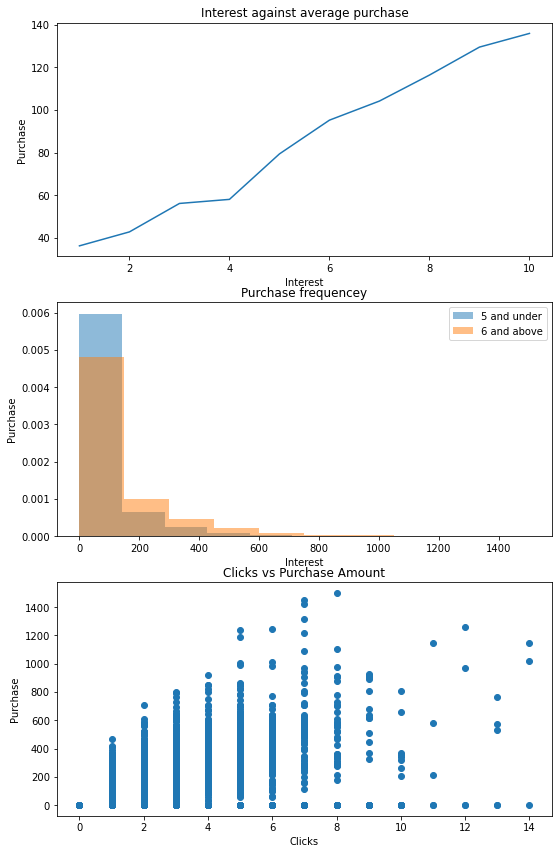

In [4]:
#Plots!

fig,axs = plt.subplots(3, figsize=(8,12))
fig.tight_layout(pad = 2.5)

add = pd.DataFrame(columns = ["Interest", "Purchased"])
for x in range(1,11):
    new = df.loc[df["Interest"] == x]
    mean = new["Purchased"].mean()
    
    y = {"Interest": [x], "Purchased": [mean]}
    d= pd.DataFrame(data = y)
    add = add.append(d, ignore_index = True)
    
axs[0].plot(add["Interest"], add["Purchased"])
axs[0].set_title("Interest against average purchase")
axs[0].set_xlabel("Interest")
axs[0].set_ylabel("Purchase")


u5 = df.loc[df["Interest"] <= 5]
a6 = df.loc[df["Interest"] >= 6]
axs[1].hist(u5["Purchased"], alpha = .5, label="5 and under", density = True)
axs[1].hist(a6["Purchased"], alpha = .5, label="6 and above", density = True)
axs[1].set_xlabel("Interest")
axs[1].set_ylabel("Purchase")
axs[1].legend(loc="upper right")
axs[1].set_title("Purchase frequencey")


axs[2].scatter(df["Clicks"], df["Purchased"])
axs[2].set_xlabel("Clicks")
axs[2].set_ylabel("Purchase")
axs[2].set_title("Clicks vs Purchase Amount")




**Markdown for C**
There appears to be a clear corelation between high interst and high purchase amount showed by the histogram and line plot trend. It also seems seems like people that click only 5 times are the most likely to purchase instead of the people that click a lot alothogh the data gets scattered on the more clicks.

**Part D:** Analyze *bands*

We want to keep our high-paying job in advertising technology (plus we get some free *Fledgies* each month, nice!), so we need to tell our bosses how well the ads are working, and who they are working on.  Player ages span from 8 years old to 78 years old.  Breaking down the data into **bands** of 10-years (e.g. $[8-18), [18-27.99), \dots [68-78]$) and split across the player's self-reported sex (3 possibilities).

Output the averages for interest, clicks, and purchases for each band as well as the average value of purchases-per-click.

In other words, report the requested averages
- For each Sex
- For each Age Band
- For each Sex+Age Band combination

In [5]:
#Make bands, and compute relevant stats for each

def getAverages(data, k):
    print(k, "interest averaege:", data["Interest"].mean())
    print(k, "click averaege:", data["Clicks"].mean())
    print(k, "purchase average:", data["Purchased"].mean())
    print(k, "puchase per click average:", data["Purchased"].mean() / data["Clicks"].mean())
    

male_d = df.loc[df["Sex"] == "M"]
female_d = df.loc[df["Sex"] == "F"]
non_d = df.loc[df["Sex"] == "Unclassified"]

getAverages(male_d, "Male")
print("")
getAverages(female_d, "Female")
print("")
getAverages(non_d, "Unclassified")
print("")


start = 8
for i in range(18, 79, 10):
    if i == 78:
        getAverages(df.loc[(df["Age"] >= start) & (df["Age"] <= i)], "Age " + str(start) + "-" + str(i))
    else:    
        getAverages(df.loc[(df["Age"] >= start) & (df["Age"] < i)], "Age " + str(start) + "-" + str(i))
    print("")
    start = start + 10
    
    
start = 8
for i in range(18, 79, 10):
    if i == 78:
        test = df.loc[(df["Age"] >= start) & (df["Age"] <= i) & (df["Sex"] == "M")]
        getAverages(test, "Male of age " + str(start) + "-" + str(i))
    else: 
        test = df.loc[(df["Age"] >= start) & (df["Age"] < i) & (df["Sex"] == "M")]
        getAverages(test, "Male of age " + str(start) + "-" + str(i))
    print("")
    start = start + 10
    
    
start = 8
for i in range(18, 79, 10):
    if i == 78:
        test = df.loc[(df["Age"] >= start) & (df["Age"] <= i) & (df["Sex"] == "F")]
        getAverages(test, "Female of age " + str(start) + "-" + str(i))
    else: 
        test = df.loc[(df["Age"] >= start) & (df["Age"] < i) & (df["Sex"] == "F")]
        getAverages(test, "Female of age " + str(start) + "-" + str(i))
    print("")
    start = start + 10   
    
start = 8
for i in range(18, 79, 10):
    if i == 78:
        test = df.loc[(df["Age"] >= start) & (df["Age"] <= i) & (df["Sex"] == "Unclassified")]
        getAverages(test, "Unclassified sex of age " + str(start) + "-" + str(i))
    else: 
        test = df.loc[(df["Age"] >= start) & (df["Age"] < i) & (df["Sex"] == "Unclassified")]
        getAverages(test, "Unclassified sex of age " + str(start) + "-" + str(i))
    print("")
    start = start + 10   


    


    



Male interest averaege: 6.16815144766147
Male click averaege: 2.442835931700074
Male purchase average: 110.17512939701692
Male puchase per click average: 45.10132177413214

Female interest averaege: 5.14426938523324
Female click averaege: 1.6345381526104417
Female purchase average: 94.65805913305113
Female puchase per click average: 57.911195882382636

Unclassified interest averaege: 5.636143117040631
Unclassified click averaege: 0.7446937537901759
Unclassified purchase average: 33.614765805371995
Unclassified puchase per click average: 45.139046264705556

Age 8-18 interest averaege: 6.512820512820513
Age 8-18 click averaege: 1.8512820512820514
Age 8-18 purchase average: 53.33947178877693
Age 8-18 puchase per click average: 28.812180052109422

Age 18-28 interest averaege: 5.640984908657665
Age 18-28 click averaege: 1.584590945194599
Age 18-28 purchase average: 70.92306476143507
Age 18-28 puchase per click average: 44.757964177767796

Age 28-38 interest averaege: 5.638162544169611
Age 2

**Part E:** Discuss

Discuss the results from **D** *in detail*.  In particular, you should do the following:
- (i) Highlight the general trend of bands: which ages/sexes tend to buy more or less?  Which ages tend to buy more or less?
- (ii) Are there any bands that suggest some age groups behave differently between men and women?  Which ones, and how do they differ?
- (iii) What groups should management target if they want to target the groups that currently purchase the most?
- (iv) What groups might management target if they want to target groups with unusually low purchases?
- (v) Does the highest "Interest" subgroup purchase the most?  Is this consistent with your results in **C**?

**Markdown for E**

1. Males tend to have the highest purchase average while females have the highest purchase per click average. Ages over 18 all tend to have the highest purchase averages. Females age 58-68 have the overall highest purchase rates.

2. Younger males and older females both have high purchase averages. And vice versa older males and younger females have slightly lower purchase averages.

3. Target females of age 48-58, and males of age 28-38 since they both have very high purchases.

4. All of the unclassified gender users have very low purchase values so managemnt should target them

5. No, males age 8-18 have the highest interest but do not have the lower purchase values. This is not consistent with C and is probably because they don't have moeny to spend on the game.

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [60 points] Problem 2: An Intro to Computational Epidemiology

### The Model

In this problem we introduce and begin to explore some of the baseline tools of computational epidemiology: the SIR and SI models.  

These models exist on graphs, where vertices or nodes represent people, agents, or surfaces that might carry a communicable disease.  Edges connecting nodes represent persons that are in close contact with one another, and at risk of exchanging the disease.  


We will implement a variant of the SIR model.  In this model, each vertex has one of three possible states:
 - **I** for Infected, and at risk of passing the disease to neighboring susceptible vertices.
 - **S** for Susceptible, and at risk of becoming infected by its neighbors
 - **R** for removed, and no longer at risk of contracting or spreading the infection.

The model evolves *iteratively*, where for each discrete time step (one unit of `time`) the following two calculations occur:

** Step 1:** First, consider all **edges** that connect an infected person to a susceptible person.  The susceptible vertex becomes infected with independent and identical probability $\beta$ *for each* edge that that connects them to an infected vertex.  This is depicted below in the SIR_Edges.png image.

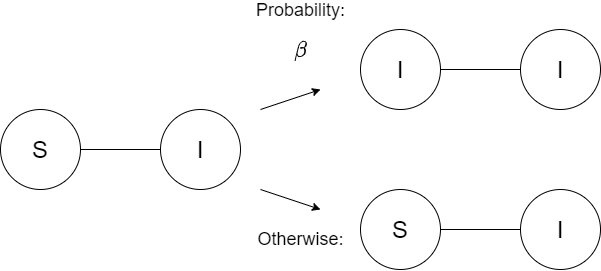

A susceptible edge can only be infected once, and is only at risk of being infected by nodes that were infected (**I**) at the *start* of each iteration: newly infected nodes don't pass the infection onwards until the next time step.

** Step 2: ** Next, consider all infected (**I**) **vertices** that were infected at the *start* of the time step - prior to step 1 - and consider them recovered **R** with probability $\gamma$.  This is depicted below in the SIR_Removal.png image.

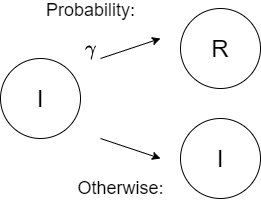

Think of this process as the probability of becoming well: not only are those ndoes no longer contagious, they also have developed antibodies that make them immune to re-infection!

The model can run for any number of time steps, but for reasonably small graphs we might expect to see the number of infections taper off to zero after a while.  If you watched any news coverage during the onset of COVID-19, one of the main tasks in predicting a pandemic is predicting the *basic reproduction number* $R_0= \frac{\beta}{\gamma}$ of the disease.  Since $\beta$ represents a rate of spread and $\gamma$ represents a rate of recovery, the ratio is important in determining whether a disease spreads faster than recovery can occur.

### Warmups (These *are* graded)

A couple of quick questions to make sure we're understanding the model and the roles of $\beta$ and $\gamma$.

Feel free to use office hours/piazza to ask more pointed questions about the Warmups **only** to make sure you understand the basics of the transition model before you approach the implementation section later.

**Part A**

Suppose we have the small system depicted at time $t=0$ below, in SIR_Warmup1.png.

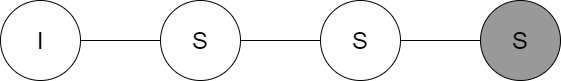

- What is the exact probability that the last node on the right is an infected node **I** after exactly 3 time steps?  

- What is the exact probability that the leftmost node is still infected at this time?  

**Markdown for Part A**:

$\beta^3$, $(1 - \gamma)^3$

**Part B**: Use your named distributions.
- Each of the prior 2 questions is exactly described by one of the named variables covered in class.  Which variable, at what value(s) are we evaluating its pdf, and what is its parameter?
- What is the average (mean) recovery time for an infected person?
- Suppose an `S` node has exactly 4 `I` neighbors, and the probability of transmission is $\beta=0.5$.  What is the exact probability that that $S$ node is infected in the next time step?

**Markdown for Part B**:

Uniform random variable, bernoili, evaluating pdf from 0 to 3

Avereage recovery time is $1/\gamma$

Chance of being infected: 15/16


**Part C**

Suppose we consider the alternative 4-vertex graph depicted below, in SIR_Warmup2.png.

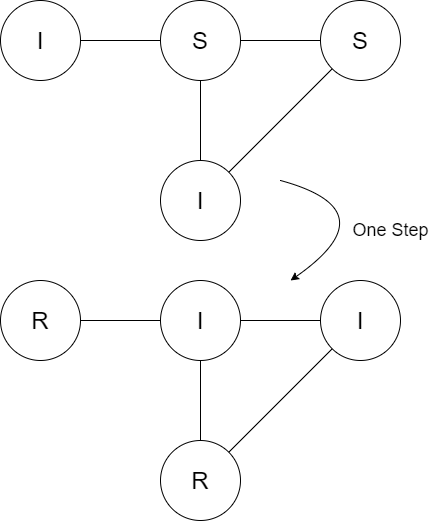

- What is the exact probability that we transition from the graph on the top to the exact graph on the bottom in a single time step?  

Note that the "center" **S** node with two infected neighbors should be more likely to end up infected than rightmost node.

**Markdown for Part C**:

$\gamma * \gamma * \beta * 1 -\beta^2$


### Coding The Model

Enough with the exact pen-and-paper solutions!  Let's run this model.  Suppose we wish to implement the SIR model on the graph below (SIR_graph.png):

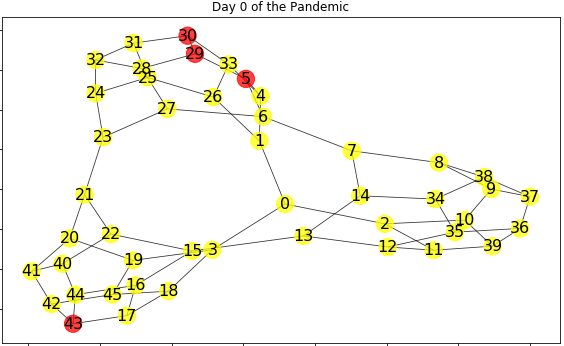

For your convenience, the two most common ways to represent this are listed below.  `edges` contains a list of each of the edges of the graph, and `neighbors` is a dictionary that contains the neighbors of each node (as a list of connected nodes).

`nodes` holds the 46 vertices, labelled by their indexes 0 through 45.
`neighbors` is a dictionary, where e.g. `neighbors[1]` holds the list of neighboring vertices to vertex #1.

In [6]:
#manual edge assignments
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

#create a dictionary as option
nodes = list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])
    
#other useful variables
nodes = list(range(21))
N = len(nodes)
#Dictionary usage:
for node in neighbors:
    print('Node # ',node, ' has neighbors of ', neighbors[node])

Node #  0  has neighbors of  [1, 2, 3]
Node #  1  has neighbors of  [0, 4, 26]
Node #  2  has neighbors of  [0, 10, 11]
Node #  3  has neighbors of  [0, 18, 19]
Node #  4  has neighbors of  [1, 5, 33]
Node #  5  has neighbors of  [4, 6, 29]
Node #  6  has neighbors of  [5, 7, 27]
Node #  7  has neighbors of  [6, 8, 14]
Node #  8  has neighbors of  [7, 9, 38]
Node #  9  has neighbors of  [8, 10, 37]
Node #  10  has neighbors of  [2, 9, 39]
Node #  11  has neighbors of  [2, 12, 39]
Node #  12  has neighbors of  [11, 13, 35]
Node #  13  has neighbors of  [12, 14, 15]
Node #  14  has neighbors of  [7, 13, 34]
Node #  15  has neighbors of  [13, 16, 22]
Node #  16  has neighbors of  [15, 17, 44]
Node #  17  has neighbors of  [16, 18, 43]
Node #  18  has neighbors of  [3, 17, 45]
Node #  19  has neighbors of  [3, 20, 45]
Node #  20  has neighbors of  [19, 21, 41]
Node #  21  has neighbors of  [20, 22, 23]
Node #  22  has neighbors of  [15, 21, 40]
Node #  23  has neighbors of  [21, 24, 27]
No

**Part D:**

Implement a function **SIR_step(states, gamma, beta)** that takes one step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.

The return of the function should be the new states for each vertex, in the same format as **initial_state**.


In [7]:
import random
def SIR_step(initial_state, gamma, beta):
    #Your code here
    new_state = initial_state
    for i in range(0, len(initial_state)):
        if initial_state[i] == 'I':
            y = neighbors[i]
            for x in range(0, len(y)):
                if initial_state[int(y[x])] == "S":
                    if random.random() <= beta:
                        new_state[int(y[x])] = "I"
    
    for i in range(0, len(initial_state)):
        if initial_state[i] == 'I':
            if random.random() <= gamma:
                new_state[i] = "R"
    
    
    return(new_state)

Run a couple of quick sanity checks and self-checks below:
 - what should happen if `states` contains no **I** nodes?
 - what should happen if `states` contains **I** nodes but $\beta=0$?


In [8]:
#Check your code is working for those trivial cases:

state = list(range(46))

for x in state:
    state[x] = "S"

new_state = SIR_step(state, .4, .5)

print("Check to see that no nodes get infected or recorver with all suspecptible nodes",new_state)

state[2] = "I"
state[4] = "I"
state[7] = "I"
state[10] = "I"
state[15] = "I"
state[20] = "I"
state[25] = "I"
state[35] = "I"

new_state = SIR_step(state,.5,0)

print("Check that the infection does not spread with bet of 0 and that infected nodes recover", new_state)

Check to see that no nodes get infected or recorver with all suspecptible nodes ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']
Check that the infection does not spread with bet of 0 and that infected nodes recover ['S', 'S', 'I', 'S', 'R', 'S', 'S', 'I', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'R', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']


**Part E:**

Time to run the model for an initial set of states and describe what happens!  Suppose the initial states of each of the nodes is such that nodes 5,29,30, and 43 are infected and the rest are susceptible.  Code for this is given below.

Now we want to create a function or a loop that runs **SIR_step** for 100 time steps.  

At the end of 100 steps, we will return only a tuple of two integers.  First, the total number of nodes that were infected over the course of the epidemic; and second, and the total days spent infected across all nodes.  These are two good measures of the severity of the epidemic!  When we take 100 steps, this represents *one* example of what could happen when an infection is set loose in a small (compartmental) environment.  As data scientists, we need to run this 100-step experiment multiple times to understand the overall descriptors of our simulated pandemic!

Implement a function **SIR_sim(intial_state, gamma, beta, n_steps)** that takes *many* step of the SIR model with a known $\beta$ and $\gamma$ on the graph given above.  It should return the tuple of **(days_lost,people_infected)**

* **initial_state** should be a list/numpy array of length 46 of the state of each vertex, e.g. `['S','S','I','I','R','S',...,'I']`.
* **gamma** is the constant determining recovery rate.
* **beta** is the constant determining transmission rate.
* **n_steps** is the number of steps.  It can be defaulted as 100.
* The return **days_lost** is the number of cumulative days all people were infected.  After each call to **SIR_step**, you should increment this amount by the number of `I` entries in your state vector.
* The return **people_infected** is the number of people that were infected into state `I` at any point in the simulation.


In [9]:
#given initialization; 'states' has 42 'S' nodes and 4 'I' nodes
states=np.array(['S']*46)
infected_states=set([5,29,30, 43])

for idx in infected_states:
    states[idx]='I'

def SIR_sim(gamma, beta, initial_state=states, n_steps=100):
    #do the thing!
    #for n_steps steps
        #take an SIR step
        #record how many additional days were lost
    #once done, see how many people got infected?
    new_state = initial_state.copy()
    days_lost = 0
    people_infected = 4
    
    infected_log = list(range(46))
    
    for x in range(0, 46):
        infected_log[x] = x
    infected_log.remove(5)
    infected_log.remove(29)
    infected_log.remove(30)
    infected_log.remove(43)
    
    for i in range(0, 100):
        copy = SIR_step(new_state, gamma, beta)
        for x in new_state:
            if x == "I":
                days_lost = days_lost +1
    
        for x in range(0, len(new_state)):
            if new_state[x] == "I":
                if x in infected_log:
                    people_infected = people_infected +1
                    infected_log.append(x)
        
        copy = new_state
    return days_lost, people_infected


**Part F:**

Run your function in part D 100 times (so you'll have 100 instances of 100 time steps) *each* for 3 different sets of values of the constants $\gamma$ and $\beta$.  The three sets of conditions we should run experiments under are:

* First, when the values of $\gamma$ and $\beta$ are each 0.15.
* Second, when $\beta=0.1$ and $\gamma=0.2$.
* Finally, when $\beta=0.2$ and $\gamma=0.1$.

For each one of those 3 sets of experiments, report the average number of people infected and average number of days lost to infection.

Sanity checks: 
- Person count should be at least 4, possibly up to 46.
- Days lost could be as low as 0 if everybody recovers on day 1, possibly approaching $46\cdot 100$ if everybody is infected all 100 days.

In [13]:
#recommended output style:
# print('For beta=',beta,' and gamma=',gamma,' lost', days_lost  ,' days between ', people_infected, ' people')

days_lost_s = list(range(100))
people_infected_s = list(range(100))

for i in range(0,100):
    days_lost_s[i], people_infected_s[i] = SIR_sim(.15,.15)
    
mean_days = sum(days_lost_s) / 100
mean_people = sum(people_infected_s) / 100

print('For beta=',.15,' and gamma=',.15,' lost', mean_days  ,' days between ', mean_people, ' people')

for i in range(0,100):
    days_lost_s[i], people_infected_s[i] = SIR_sim(.2,.1)
    
mean_days = sum(days_lost_s) / 100
mean_people = sum(people_infected_s) / 100
    
print('For beta=',.1,' and gamma=',.2,' lost', mean_days  ,' days between ', mean_people, ' people')

for i in range(0,100):
    days_lost_s[i], people_infected_s[i] = SIR_sim(.1,.2)
    
mean_days = sum(days_lost_s) / 100
mean_people = sum(people_infected_s) / 100
    
print('For beta=',.2,' and gamma=',.1,' lost', mean_days  ,' days between ', mean_people, ' people')

For beta= 0.15  and gamma= 0.15  lost 130.33  days between  110.27  people
For beta= 0.1  and gamma= 0.2  lost 45.71  days between  31.57  people
For beta= 0.2  and gamma= 0.1  lost 331.93  days between  296.21  people


** Part G: **
What does a Vaccine do?  You should have found that the settings of $\beta=0.2$ and $\gamma=0.1$ typically caused the most dangerous pandemic.  These numbers represent a disease that takes on average around 10 time steps (days) to recover from, and is highly infectious in that period: numbers reasonable for current COVID-19 data.  

But suppose we have access to a vaccine, and when a person take a vaccine they are immediately set to be type `R` removed nodes.  We want to investigate the effects of a vaccine and whether or not our model can capture the idea of "herd" immunity, where sufficient vaccination imbues protections on the unvaccinated.

Suppose *before* the start of your SIR_sim you take exactly $k$ of the 42 `S` individuals and reclassify them as `R`, representing individuals who have been innoculated against infection.  Keep the same 4 infected people at the start of each run.  Run 50 simulations *each* for the values of $k=[0,4,8,12,...,40]$ for a total of 11 additional sets of simulations.

For each one of those 11 sets of experiments, save the average number of people infected and average number of days lost to infection.  

It should be clear that vaccination helps those that *are* vaccinated, but does it help the unvaccinated as well?  After your study of $k$, create a pair of side-by-side plots.  

- In the first, make the $x$-axis is $k$ and the $y$-axis the average number of days lost.
- In the second, again make the $x$-axis is $k$ and make the $y$-axis the average *proportion of initial `S` states* infected.
- Do there appear to be any values of $k$ which lead to larger decreases than others?  Which ones? 

In [11]:
#sims
day_average = list(range(11))
people_average = list(range(11))


for i in range(0, 11):
    day_sum = 0
    people_sum = 0
    k = i * 4
    
    new_state = states.copy()
    for x in range(0,k):
        if new_state[x] == "S":
            new_state[x] = "R"
    
    for x in range(0, 50):
        day, people = SIR_sim(.1,.2, new_state)
        day_sum = day_sum + day
        people_sum = people_sum + people
    
    day_average[i] = day_sum / 50
    people_average[i] = people_sum / 50
            



It looks like there is a dip around a k value of 10 and it looks like it flattens out at around 35 people vaccinated.


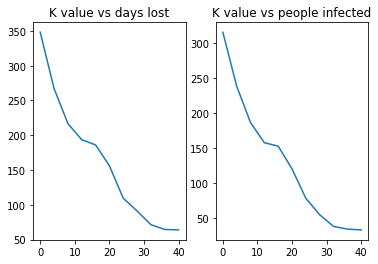

In [12]:
#plots
k = list(range(11))

for x in range(0, 11):
    k[x] = x *4
    
    
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(k, day_average)
ax2.plot(k, people_average)
ax1.set_title("K value vs days lost")
ax2.set_title("K value vs people infected")

print("It looks like there is a dip around a k value of 10 and it looks like it flattens out at around 35 people vaccinated.")

**Part H: **

Comment on anything you found interesting or unusual.

It seems that days lost and people infected are very proportional to one another and that people infected is always slightly less than days lost

Computational epidemiology is a huge field, and models can add all kinds of added components: nodes could be surfaces *or* people, graphs could be representing cities or communities instead of individuals, etc.  One similar model is used instead for diseases that don't ever have **R** states: nodes just transition from **I** to **S** because there may be no long-term immunity after infection.  This is pretty relevant for COVID-19, because current data suggest a long-term decline in antibodies whether they came from infection or from a vaccine, so we might want `R` node status to "wear off" after a while, or allow for a lesser but non-zero probability of infection from an `I` node.

If you're ever interested in learning more about computational epidemiology, CU-Boulder has a couple of world experts in network-based epidemology and computational public health.  Check out the CS department's course offerings by Aaron Clauset, Dan Larremore, and others for great opportunities to do these sorts of things in a more advanced setting.

<br>

---
[Back to top](#top)
<a id='bot'></a>

### Appendix: Graph plotting code

In [14]:
#here's the code to generate the given plot.  It is not needed for any of your tasks,
#...but if you're interested in including some visualizations in your analysis in parts F/G you can start with this!
#create the graph in networkx
import networkx as nx

#NB: this is a well known graph known as the "Tutte" graph
edges=[(0, 1), (0, 2), (0, 3), (1, 4), (1, 26), (2, 10), (2, 11), (3, 18), (3, 19), \
       (4, 5), (4, 33), (5, 6), (5, 29), (6, 7), (6, 27), (7, 8), (7, 14), (8, 9), (8, 38), \
       (9, 10), (9, 37), (10, 39), (11, 12), (11, 39), (12, 13), (12, 35), (13, 14), (13, 15),\
       (14, 34), (15, 16), (15, 22), (16, 17), (16, 44), (17, 18), (17, 43), (18, 45), (19, 20), \
       (19, 45), (20, 21), (20, 41), (21, 22), (21, 23), (22, 40), (23, 24), (23, 27), (24, 25), \
       (24, 32), (25, 26), (25, 31), (26, 33), (27, 28), (28, 29), (28, 32), (29, 30), (30, 31), \
       (30, 33), (31, 32), (34, 35), (34, 38), (35, 36), (36, 37), (36, 39), (37, 38), (40, 41), \
       (40, 44), (41, 42), (42, 43), (42, 45), (43, 44)]

nodes=list(range(46))
neighbors={key: [] for key in range(len(nodes))} 
for edge in edges:
    neighbors[edge[0]].append(edge[1])
    neighbors[edge[1]].append(edge[0])

G=nx.Graph()
G.add_nodes_from(nodes)
for i in range(len(edges)):
    G.add_edge(edges[i][0],edges[i][1])

np.random.seed(3022)
pos = nx.spring_layout(G) #algorithm that tries to "cluster" node plot locations; it saves the xy coords of each vertex

infected=set([5,29,30, 43])
sus=set(range(46))-infected

colorf=lambda x: 'red' if (x in infected) else ('yellow' if x in sus else 'green')
colors=[colorf(node) for node in nodes]
labels=dict(zip(range(46),range(46))); #label 0-45

fig, ax=plt.subplots(figsize=(10,6))
#draw the nodes, using xy-node layout 'pos' provided
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=300, alpha=.75); #node colors easy to see labels over
nx.draw_networkx_edges(G, pos, width=0.8, alpha=0.8); #draw edges, using xy-node layout provided
nx.draw_networkx_labels(G, pos, labels, font_size=16); #label vertices by index/number
ax.set_title('Day 0 of the Pandemic');

ImportError: cannot import name 'gcd' from 'fractions' (/opt/conda/lib/python3.9/fractions.py)